In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving turkiye-student-evaluation_generic.csv to turkiye-student-evaluation_generic.csv
User uploaded file "turkiye-student-evaluation_generic.csv" with length 391968 bytes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import os

import collections
from collections import Counter as count

import seaborn as sns
sns.set_style('whitegrid')

data=pd.read_csv('turkiye-student-evaluation_generic.csv')
print(data.head())
data.describe()

   instr  class  nb.repeat  attendance  difficulty  ...  Q24  Q25  Q26  Q27  Q28
0      1      2          1           0           4  ...    3    3    3    3    3
1      1      2          1           1           3  ...    3    3    3    3    3
2      1      2          1           2           4  ...    5    5    5    5    5
3      1      2          1           1           3  ...    3    3    3    3    3
4      1      2          1           0           1  ...    1    1    1    1    1

[5 rows x 33 columns]


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


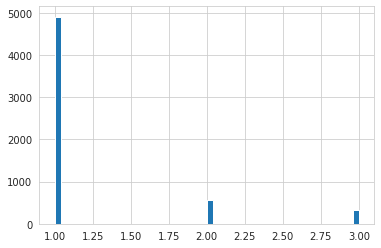

In [ ]:
data['nb.repeat'].hist(bins=50)

In [ ]:
data.info()
print("\n\t data dimensions:", data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [ ]:
X=data.iloc[:,5:25]
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X=pca.fit_transform(X)


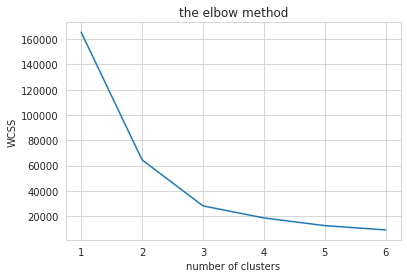

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,7):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,7),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

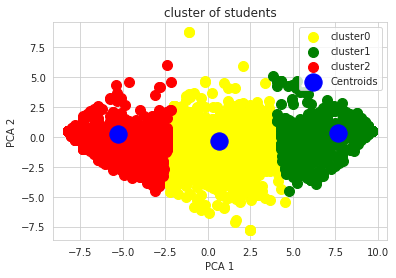

Counter({0: 2389, 2: 2158, 1: 1273})
silhouette score: 0.571


In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_kmeans=kmeans.fit_predict(X)


plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='yellow',label='cluster0')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='green',label='cluster1')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='red',label='cluster2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='blue',label='Centroids')
plt.title('cluster of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

import  collections
collections.Counter(y_kmeans)

model.fit(qPca)

name = "k-means++"

#count(y_kmeans)
counts = collections.Counter(y_kmeans)
kmeans.fit(qPca)
print(counts)
print('silhouette score: %.3f'% (metrics.silhouette_score(qPca, kmeans.labels_,metric='euclidean')))

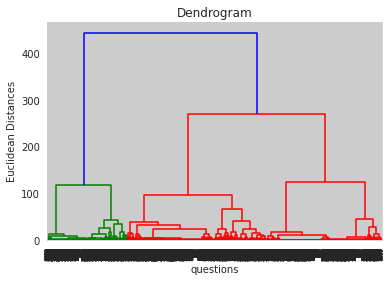

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(qPca,method='ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean Distances')
plt.show()

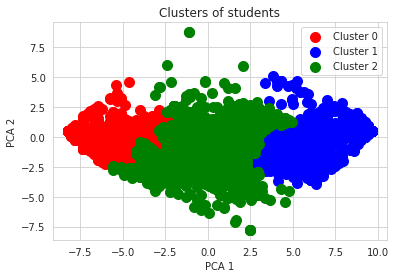

Counter({2: 2397, 0: 2011, 1: 1412})
silhouette score: 0.571


In [ ]:
from sklearn.cluster import AgglomerativeClustering
#timer_start = time.perf_counter()

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

#timer_end = time.perf_counter() 
#print(f"\n AGNES done in {timer_end - timer_start:0.4f} seconds")

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 2')

plt.title('Clusters of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

#count(y_hc)
counts=collections.Counter(y_hc)
print(counts)
hc.fit(qPca)

print('silhouette score: %.3f'% (metrics.silhouette_score(qPca, kmeans.labels_,metric='euclidean')))

number of clusters:  3
Counter({0: 4735, 1: 691, -1: 394})
unclustered percentage:  0.06769759450171821
silhouette score: 0.327


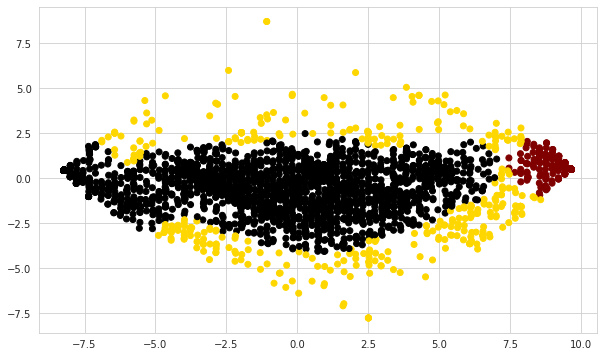

In [ ]:
from sklearn.cluster import DBSCAN
#timer_start = time.perf_counter()
pca = PCA(n_components = 2, random_state = 1)
qPca = pca.fit_transform(X)

model = DBSCAN(eps = 1
               , min_samples = 80)

model.fit(qPca)

#timer_end = time.perf_counter() 
#print(f"\n DBSCAN done in {timer_end - timer_start:0.4f} seconds")

clusters2 = model.labels_
colors = ['black', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'gold']
vectorizer = np.vectorize(lambda x : colors[x%len(colors)])

plt.figure(figsize = (10,6))
plt.scatter(qPca[:, 0], qPca[:, 1], c = vectorizer(clusters2))
counts = collections.Counter(clusters2)
print("number of clusters: ", len(counts))
print(counts)
print("unclustered percentage: ", counts[-1]/5820)


model.fit(qPca)
print('silhouette score: %.3f'% (metrics.silhouette_score(qPca, model.labels_,metric='euclidean')))